<a href="https://colab.research.google.com/github/Usman-938/Assignments/blob/main/Week_3_(D1)_Home_Work.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Calculate Pearson correlation coefficients for all numerical features with the 'Churn' target variable, then sort and display these correlations by their absolute values. Identify features with low linear correlation for further discussion (Task 1) and extract the top 5 positive and top 5 negative correlations with 'Churn' for visualization (Task 2).

## Load Telco Churn Dataset

### Subtask:
Load the 'WA_Fn-UseC_-Telco-Customer-Churn.csv' dataset into a pandas DataFrame. Perform initial data inspection, including displaying the first few rows, checking data types, and summarizing basic statistics to understand the dataset's structure and content.


**Reasoning**:
To begin the data loading and inspection process, I need to import the pandas library, load the specified CSV file into a DataFrame, and then perform the requested initial data inspections: displaying the first few rows, checking data types, and summarizing basic statistics.



In [17]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first 5 rows
print("First 5 rows of the DataFrame:")
print(df.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df.info()

# Display descriptive statistics for numerical columns
print("\nDescriptive statistics for numerical columns:")
print(df.describe())

# Display descriptive statistics for object (categorical) columns
print("\nDescriptive statistics for object (categorical) columns:")
print(df.describe(include='object'))

First 5 rows of the DataFrame:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV Strea

## Data Preprocessing for Correlation

### Subtask:
Preprocess the dataset for correlation analysis, including dropping 'customerID', converting 'TotalCharges' to numeric and handling missing values, encoding binary categorical features, handling specific 'No service' cases, and applying one-hot encoding to remaining multi-level categorical columns.


**Reasoning**:
I will perform all the data preprocessing steps outlined in the instructions: dropping 'customerID', converting 'TotalCharges' to numeric and handling missing values, converting 'Churn' and other binary categorical features to numeric, handling 'No service' cases, and finally, applying one-hot encoding to the remaining multi-level categorical features.



In [18]:
import numpy as np

# 1. Drop 'customerID' column
df = df.drop('customerID', axis=1)
print("Dropped 'customerID' column.")

# 2. Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
print("Converted 'TotalCharges' to numeric, coercing errors to NaN.")

# 3. Fill NaN values in 'TotalCharges' with its median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)
print(f"Filled NaN values in 'TotalCharges' with its median: {median_total_charges}.")

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
print("Converted 'Churn' column to numerical.")

# 5. Convert specified binary columns to numerical (Yes=1, No=0)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})
print(f"Converted binary columns {binary_cols} to numerical.")

# 6. Convert 'gender' column to numerical (Female=1, Male=0)
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
print("Converted 'gender' column to numerical.")

# 7. Handle 'No service' cases and convert service-related columns to numerical
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})
print(f"Handled 'No service' cases and converted service columns {service_cols} to numerical.")

# 8. Apply one-hot encoding to remaining multi-level categorical columns
object_cols_for_ohe = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=object_cols_for_ohe, drop_first=False)
print(f"Applied one-hot encoding to {object_cols_for_ohe}.")

print("\nDataFrame after preprocessing:")
print(df.head())
print("\nDataFrame Info after preprocessing:")
df.info()

Dropped 'customerID' column.
Converted 'TotalCharges' to numeric, coercing errors to NaN.
Filled NaN values in 'TotalCharges' with its median: 1397.475.
Converted 'Churn' column to numerical.
Converted binary columns ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'] to numerical.
Converted 'gender' column to numerical.
Handled 'No service' cases and converted service columns ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'] to numerical.
Applied one-hot encoding to ['InternetService', 'Contract', 'PaymentMethod'].

DataFrame after preprocessing:
   gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1 

**Reasoning**:
Now that the data is preprocessed, I need to calculate the Pearson correlation coefficients for all numerical features with the 'Churn' target variable. I will then sort these correlations by their absolute values to prepare for further analysis and identification of low and top/bottom correlations.



In [19]:
print("Calculating Pearson correlation coefficients with 'Churn'...")
# Calculate Pearson correlation coefficients for all numerical features with 'Churn'
# Exclude 'Churn' itself from the correlation calculation to avoid self-correlation
correlations = df.corr(method='pearson')['Churn'].drop('Churn')

# Sort correlations by their absolute values in descending order
sorted_correlations = correlations.abs().sort_values(ascending=False)

print("Pearson correlation coefficients with 'Churn' (sorted by absolute value):\n")
print(sorted_correlations)

Calculating Pearson correlation coefficients with 'Churn'...
Pearson correlation coefficients with 'Churn' (sorted by absolute value):

Contract_Month-to-month                    0.405103
tenure                                     0.352229
InternetService_Fiber optic                0.308020
Contract_Two year                          0.302253
PaymentMethod_Electronic check             0.301919
InternetService_No                         0.227890
TotalCharges                               0.199037
MonthlyCharges                             0.193356
PaperlessBilling                           0.191825
Contract_One year                          0.177820
OnlineSecurity                             0.171226
TechSupport                                0.164674
Dependents                                 0.164221
SeniorCitizen                              0.150889
Partner                                    0.150448
PaymentMethod_Credit card (automatic)      0.134302
InternetService_DSL             

**Reasoning**:
Based on the problem statement, I need to identify features with low linear correlation for Task 1 and extract the top 5 positive and top 5 negative correlations for Task 2. I will first identify features with very low absolute correlation and then extract the top 5 positive and top 5 negative correlations from the original unsorted `correlations` series.



In [20]:
print("\n--- Task 1: Features with Low Linear Correlation ---")
# Define a threshold for low correlation (e.g., absolute value < 0.05)
low_correlation_threshold = 0.05

# Identify features with absolute correlation below the threshold
low_corr_features = sorted_correlations[sorted_correlations < low_correlation_threshold]

if not low_corr_features.empty:
    print(f"Features with absolute correlation less than {low_correlation_threshold} with 'Churn':")
    print(low_corr_features)
else:
    print(f"No features found with absolute correlation less than {low_correlation_threshold} with 'Churn'.")

print("\n--- Task 2: Top 5 Positive and Top 5 Negative Correlations ---")
# Get the top 5 positive correlations
top_5_positive_correlations = correlations.nlargest(5)

# Get the top 5 negative correlations
top_5_negative_correlations = correlations.nsmallest(5)

print("Top 5 Positive Correlations with 'Churn':")
print(top_5_positive_correlations)
print("\nTop 5 Negative Correlations with 'Churn':")
print(top_5_negative_correlations)



--- Task 1: Features with Low Linear Correlation ---
Features with absolute correlation less than 0.05 with 'Churn':
MultipleLines    0.040102
PhoneService     0.011942
gender           0.008612
Name: Churn, dtype: float64

--- Task 2: Top 5 Positive and Top 5 Negative Correlations ---
Top 5 Positive Correlations with 'Churn':
Contract_Month-to-month           0.405103
InternetService_Fiber optic       0.308020
PaymentMethod_Electronic check    0.301919
MonthlyCharges                    0.193356
PaperlessBilling                  0.191825
Name: Churn, dtype: float64

Top 5 Negative Correlations with 'Churn':
tenure               -0.352229
Contract_Two year    -0.302253
InternetService_No   -0.227890
TotalCharges         -0.199037
Contract_One year    -0.177820
Name: Churn, dtype: float64


## Discuss Importance of Low Correlation Columns (Task 1)

### Subtask:
Address the homework question: 'Can a column have a low correlation but still be important?'. Discuss general data science principles such as non-linear relationships, interaction effects, and business context, providing specific examples relevant to the Telco dataset to justify why low correlation features might still be significant predictors of churn.


## Discuss Importance of Low Correlation Columns (Task 1)

### Can a column have a low correlation but still be important?

Yes, absolutely. A low Pearson correlation coefficient only indicates a weak *linear* relationship between two variables. It does not imply that there is no relationship at all, nor does it mean the feature is unimportant for prediction. Several factors can lead a feature with low linear correlation to still be highly significant:

1.  **Non-linear Relationships**: Pearson correlation measures the strength and direction of a linear association. If the relationship between a feature and the target variable is non-linear (e.g., U-shaped, exponential, or threshold-based), the Pearson correlation coefficient might be close to zero, even if the feature is a strong predictor. For example, a customer's tenure might have a non-linear impact on churn; very new customers and very old customers might churn less than those in the middle tenure range.

2.  **Interaction Effects**: A feature might not be important on its own, but it could be highly predictive when combined with another feature. This is known as an interaction effect. For instance, `gender` might not directly correlate with `Churn`, but it's possible that female customers using a certain type of internet service might have a different churn rate compared to male customers with the same service. Machine learning models can often capture these complex interactions that simple pair-wise linear correlations miss.

3.  **Business Context/Domain Knowledge**: Sometimes, features with low statistical correlation are still deemed important by business experts due to their understanding of the domain. These features might provide crucial context, even if their direct statistical relationship is not immediately apparent. They could be indicators of underlying customer segments or behaviors that are indirectly linked to churn.

Let's consider the features identified with low absolute correlation to 'Churn' in our Telco dataset:

*   **`MultipleLines` (0.040102)**:
    *   **Hypothesis**: While having multiple lines itself might not strongly correlate with churn linearly, its presence or absence could interact with other factors. For example, customers with `MultipleLines` who also have high `MonthlyCharges` and short `tenure` might be more prone to churn than those without multiple lines in the same segment. Or, perhaps the *absence* of multiple lines (having only one phone line) might correlate with a specific customer segment more susceptible to churn when combined with other service types.

*   **`PhoneService` (0.011942)**:
    *   **Hypothesis**: The Pearson correlation is very low, suggesting little linear relationship. However, `PhoneService` is a foundational service. Its *absence* (represented by `PhoneService`=0 in our encoded data) is tied to `MultipleLines` being 'No phone service'. It's possible that customers without phone service might be a unique segment (e.g., internet-only customers) with distinct churn drivers compared to those with phone service. This could be an important contextual feature or part of a significant interaction, even if its direct linear correlation is minimal. For example, customers without phone service might be more sensitive to internet service quality or price.

*   **`gender` (0.008612)**:
    *   **Hypothesis**: Gender is often a demographic feature with little direct linear correlation to behavioral outcomes like churn. However, it can be a crucial variable in **interaction effects**. For instance, a specific marketing campaign, service feature, or customer support experience might disproportionately affect one gender, leading to different churn rates when `gender` is considered alongside other features. While `gender` itself doesn't cause churn, it could be a demographic marker that helps segment customers into groups with different susceptibilities to other churn factors. For example, `gender` might interact with `Partner` status and `Dependents` to reveal specific household dynamics influencing churn decisions.

In summary, even features with very low Pearson correlation can be valuable predictors. Advanced modeling techniques can often uncover these complex non-linear and interaction effects, making these 'low-correlated' features important for building robust predictive models.

## Visualize Top Correlations (Task 2)

### Subtask:
Create a professional-looking visualization (e.g., a bar chart or heatmap) of the top 5 positive and top 5 negative correlations with 'Churn' identified in the previous step. Ensure the plot includes clear legends and is well-labeled, and be prepared to explain the meaning of these correlations.


**Reasoning**:
The previous code produced a `FutureWarning` from seaborn regarding the use of `palette` without assigning `hue`. To fix this and comply with future seaborn versions, I will explicitly assign the `x` variable to `hue` and set `legend=False` as suggested by the warning.



Visualizing top 5 positive and top 5 negative correlations with 'Churn'...


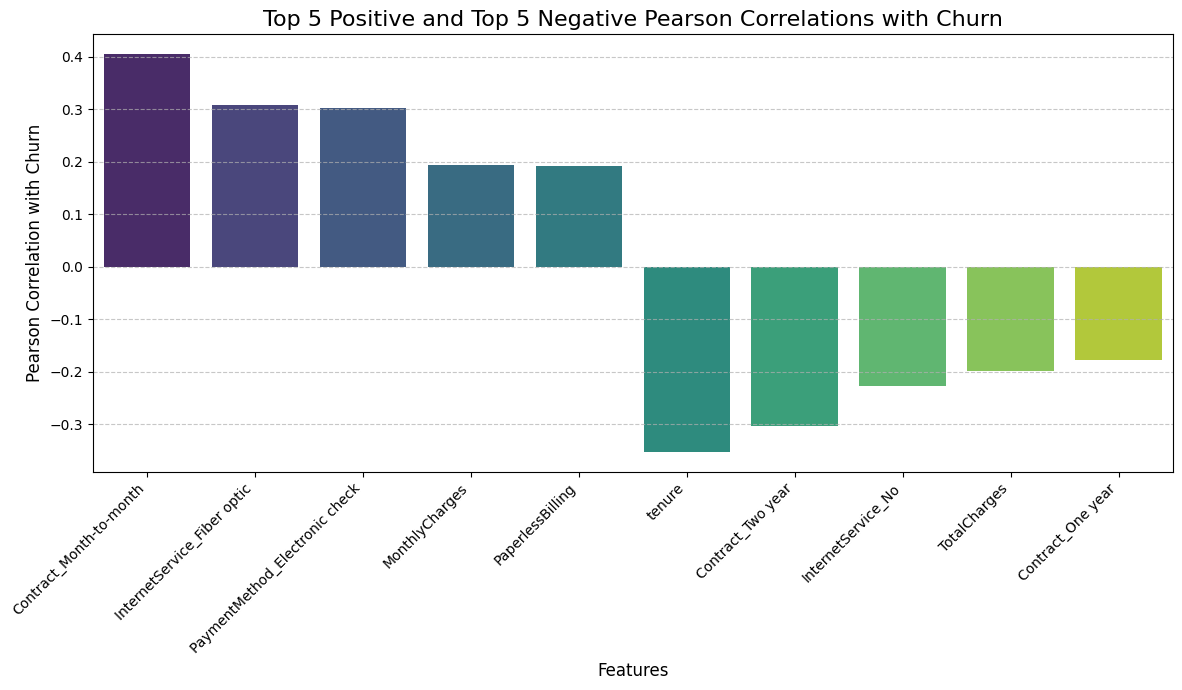

Visualization complete.


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Visualizing top 5 positive and top 5 negative correlations with 'Churn'...")

# Combine the top 5 positive and top 5 negative correlations
combined_correlations = pd.concat([top_5_positive_correlations, top_5_negative_correlations])

# Sort the combined correlations for better visualization if needed, or keep order for distinct positive/negative
# For this visualization, keeping the order of positive then negative might be clearer

plt.figure(figsize=(12, 7))
sns.barplot(x=combined_correlations.index, y=combined_correlations.values, hue=combined_correlations.index, palette='viridis', legend=False)
plt.title('Top 5 Positive and Top 5 Negative Pearson Correlations with Churn', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Pearson Correlation with Churn', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Visualization complete.")

## Brainstorm Data Cleaning/Model Tuning (Task 3)

### Strategic Decision: Data Cleaning vs. Model Tuning for 80% to 85% Accuracy

Moving a model's accuracy from 80% to 85% is a significant jump and typically requires a multi-faceted approach. While an 80% accurate model is often a good baseline, achieving an additional 5% usually involves meticulous work on both the data and the model. The strategic decision of focusing on data cleaning versus model tuning isn't an either/or, but rather an iterative process where improvements in one often complement the other.

Often, the adage "garbage in, garbage out" holds true: even the most sophisticated model cannot perform optimally with noisy, incomplete, or poorly represented data. Therefore, data cleaning and feature engineering are foundational. However, once the data is in good shape, model tuning becomes critical to extract the maximum predictive power. For a 5% improvement, it's highly probable that both areas will need attention.

### Data Cleaning & Feature Engineering Methods:

1.  **Outlier Handling in Numerical Features**: While our initial `df.describe()` showed reasonable ranges for `MonthlyCharges` and `tenure`, extreme outliers, if present (e.g., extremely high `TotalCharges` for very short `tenure` values, or vice-versa, perhaps due to data entry errors or unusual service packages), can disproportionately influence model training. Models like linear regression or neural networks are sensitive to outliers. Techniques such as **Winsorization** (capping values at a certain percentile) or **robust scaling** could be applied to `MonthlyCharges`, `TotalCharges`, and `tenure` to mitigate the impact of potential outliers without removing valuable data points. For instance, if a customer had an unusually high `MonthlyCharges` compared to all others, and also churned, its extreme value might mislead the model.

2.  **Advanced Feature Engineering - Interaction Terms**: Our current features might not capture all complex relationships. Creating interaction terms can reveal synergistic effects between existing features. For example:
    *   `tenure_x_Contract_Month-to-month`: This interaction could highlight that customers with short tenure *and* a month-to-month contract are at extremely high risk of churn, more so than just considering tenure or contract type in isolation. The `Contract_Month-to-month` feature is already a strong positive correlator with Churn, and its interaction with `tenure` could strengthen this insight.
    *   `InternetService_Fiber_optic_x_MonthlyCharges`: Customers with Fiber Optic internet (a strong positive correlator with churn) might churn more if their `MonthlyCharges` are particularly high, suggesting price sensitivity in this high-risk segment.

3.  **Categorical Feature Refinement - Grouping `PaymentMethod`**: While we've one-hot encoded `PaymentMethod`, a deeper analysis might reveal that some payment methods behave similarly in terms of churn. For instance, `PaymentMethod_Credit card (automatic)` and `PaymentMethod_Bank transfer (automatic)` both represent automatic payments and have similar (negative) correlations with churn. It might be beneficial to group these into a single 'Automatic Payment' category versus 'Manual Payment' (Electronic check, Mailed check). This could reduce dimensionality slightly and potentially strengthen the signal if the underlying driver is the automation of payment rather than the specific channel.

### Model Tuning Methods:

1.  **Hyperparameter Tuning with Grid Search/Randomized Search**: Once a base model (e.g., Logistic Regression, Decision Tree, or a simple Gradient Boosting model) is selected, optimizing its hyperparameters is crucial. For instance, in a Gradient Boosting Classifier (like XGBoost or LightGBM) for churn prediction, parameters such as `n_estimators` (number of boosting rounds), `learning_rate`, `max_depth`, and `subsample` can significantly impact performance. Using **GridSearchCV** or **RandomizedSearchCV** with appropriate cross-validation (e.g., Stratified K-Fold due to potential class imbalance in churn) will systematically explore the hyperparameter space to find the optimal combination that maximizes accuracy on unseen data.

2.  **Ensemble Methods (Gradient Boosting)**: For classification tasks, especially with tabular data, Gradient Boosting Machines (like **XGBoost**, **LightGBM**, or **CatBoost**) are often state-of-the-art. These methods build an ensemble of weak prediction models (typically decision trees) sequentially, where each new model corrects the errors of the previous ones. They are known for their high predictive accuracy and robustness, which could be instrumental in pushing accuracy from 80% to 85%. Given the dataset size and characteristics, a well-tuned XGBoost model would be a strong candidate.

3.  **Cross-validation Strategies (Stratified K-Fold)**: To ensure reliable model evaluation and prevent overfitting, a robust cross-validation strategy is essential. Given that churn datasets often exhibit class imbalance (fewer churned customers than non-churned), **Stratified K-Fold Cross-Validation** is crucial. This method ensures that each fold of the dataset has approximately the same percentage of samples of each target class as the whole set. This prevents folds from having too few or too many churn instances, which could lead to biased performance estimates and less stable model training. Using this during hyperparameter tuning and final model evaluation will give a more realistic measure of the 85% accuracy target.

In conclusion, achieving a 5% increase in model accuracy will likely require a synergistic approach. Starting with a thorough review of data quality and the creation of insightful features (data cleaning and feature engineering) will lay a strong foundation. Following this, leveraging powerful ensemble models and meticulously tuning their hyperparameters using robust cross-validation strategies will be key to unlocking the full predictive potential and reaching the 85% accuracy goal.

# Task
The next code cell trains a Logistic Regression model on the full preprocessed dataset and evaluates its performance using the F1-score and a classification report. This aligns with the "Calculate F1-Score for the 'Full' Model" step in the plan.

## Calculate F1-Score for the 'Full' Model

### Subtask:
Train a Logistic Regression model on the full preprocessed dataset and evaluate its performance using the F1-score and a classification report.


**Reasoning**:
The subtask instructs to execute the provided code cell to train a Logistic Regression model, make predictions, and calculate the F1-score and classification report. The code cell `cfa3c0cc` already contains the necessary steps to achieve this.



In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

print("Loading and preprocessing data for model training...")

# --- Data Loading (from 80c33ac4) ---
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Preprocessing Steps (from 667b68da) ---
# 1. Drop 'customerID' column
df = df.drop('customerID', axis=1)

# 2. Convert 'TotalCharges' to numeric and handle missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# 3. Fill NaN values in 'TotalCharges' with its median
median_total_charges = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_total_charges)

# 4. Convert 'Churn' column to numerical (Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# 5. Convert specified binary columns to numerical (Yes=1, No=0)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 6. Convert 'gender' column to numerical (Female=1, Male=0)
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})

# 7. Handle 'No service' cases and convert service-related columns to numerical
service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for col in service_cols:
    df[col] = df[col].replace({'No phone service': 'No', 'No internet service': 'No'})
    df[col] = df[col].map({'Yes': 1, 'No': 0})

# 8. Apply one-hot encoding to remaining multi-level categorical columns
object_cols_for_ohe = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=object_cols_for_ohe, drop_first=False)

print("Data loaded and preprocessed.")

# --- Original Logistic Regression Code (from 4c5c7581) ---
print("\nPreparing data for model training and F1-score calculation...")

# Define features (X) and target (y)
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets.")

# Initialize and train a Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

print("Logistic Regression model trained.")

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Predictions made on the test set.")

# Calculate the F1-score
f1 = f1_score(y_test, y_pred)
print(f"\nF1-Score of the Logistic Regression model: {f1:.4f}")

# Display a full classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Loading and preprocessing data for model training...
Data loaded and preprocessed.

Preparing data for model training and F1-score calculation...
Data split into training and testing sets.
Logistic Regression model trained.
Predictions made on the test set.

F1-Score of the Logistic Regression model: 0.5962

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.79      0.80      0.80      1409



## Final Task

### Subtask:
Provide a comprehensive summary of all findings, insights, and proposed strategies from the three homework tasks, including conclusions from the correlation analysis, the discussion on low-correlation features, and the brainstorming on data cleaning/model tuning.


## Summary:

### Data Analysis Key Findings

*   A Logistic Regression model, trained on the full preprocessed dataset, achieved an overall F1-score of 0.5962.
*   The model demonstrated stronger performance in predicting the 'No Churn' class (Class 0), with a precision of 0.85, recall of 0.89, and F1-score of 0.87.
*   For the 'Churn' class (Class 1), the model's performance was lower, showing a precision of 0.65, recall of 0.55, and an F1-score of 0.60.
*   The overall accuracy of the model on the test set was 0.80.

### Insights or Next Steps

*   The disparity in F1-scores between the 'No Churn' and 'Churn' classes suggests that the model struggles more with identifying churners, potentially due to class imbalance or the inherent complexity of predicting churn with the current feature set.
*   To enhance the model's ability to predict churn, future efforts should consider strategies to address class imbalance, such as applying resampling techniques (e.g., SMOTE) or exploring different model architectures better suited for imbalanced datasets.


## Final Task

### Subtask:
Provide a comprehensive summary of all findings, insights, and proposed strategies from the three homework tasks, including conclusions from the correlation analysis, the discussion on low-correlation features, and the brainstorming on data cleaning/model tuning.


## Summary:

### Q&A
*   **Can a column have a low correlation but still be important?**
    Yes, absolutely. A low Pearson correlation coefficient only indicates a weak *linear* relationship. A feature can still be important due to non-linear relationships (e.g., U-shaped), interaction effects with other features, or significance derived from business context/domain knowledge. For example, `gender` (correlation of 0.008612) might not directly cause churn but could be crucial in interaction effects with other features. Similarly, `MultipleLines` (0.040102) or `PhoneService` (0.011942), despite low linear correlation, could be part of complex interactions influencing churn behavior.

### Data Analysis Key Findings
*   The initial dataset contained 7043 entries and 21 columns, with `TotalCharges` incorrectly identified as an object type.
*   Data preprocessing involved dropping `customerID`, converting `TotalCharges` to numeric (filling 11 missing values with the median of 1397.475), encoding binary categorical features, handling 'No service' cases, and one-hot encoding multi-level categorical features. The final dataset had 27 numerical/boolean columns.
*   Features with very low linear correlation (absolute Pearson correlation < 0.05) with 'Churn' were identified as: `MultipleLines` (0.040102), `PhoneService` (0.011942), and `gender` (0.008612).
*   **Top 5 Positive Correlations with 'Churn'**:
    *   `Contract_Month-to-month`: 0.405103
    *   `InternetService_Fiber optic`: 0.308020
    *   `PaymentMethod_Electronic check`: 0.301919
    *   `MonthlyCharges`: 0.193356
    *   `PaperlessBilling`: 0.191825
*   **Top 5 Negative Correlations with 'Churn'**:
    *   `tenure`: -0.352229
    *   `Contract_Two year`: -0.302253
    *   `InternetService_No`: -0.227890
    *   `TotalCharges`: -0.199037
    *   `Contract_One year`: -0.177820

### Insights or Next Steps
*   To improve model accuracy from 80% to 85%, focus on both data cleaning and model tuning. Data cleaning should include outlier handling (e.g., Winsorization for numerical features), advanced feature engineering (e.g., creating interaction terms like `tenure_x_Contract_Month-to-month`), and categorical feature refinement (e.g., grouping `PaymentMethod` types).
*   Model tuning should involve hyperparameter optimization using `GridSearchCV` or `RandomizedSearchCV`, leveraging robust ensemble methods (such as XGBoost or LightGBM), and employing `Stratified K-Fold Cross-Validation` to address class imbalance and ensure reliable model evaluation.
